In [61]:
from math import *
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as sps

import time


In [62]:
a = -1
b = 1

def f(x):   
    return (1/(1 + x**2) + 1 + x)

In [63]:
x = np.arange(-1, 1, 1e-3)
f_array = []
for i in x:
    f_array.append(f(i))


In [64]:
def generateNeuman(a, b):
    while True:  
        M = f(b)
        r = float(np.random.uniform(a, b))
        mu = float(np.random.uniform(0.0, M))
        
        if mu <= f(r): 
            return r

In [65]:
array_for_hist = []
for i in range(0, 100000):
    value = generateNeuman(a, b)
    array_for_hist.append(value)


<AxesSubplot: ylabel='Count'>

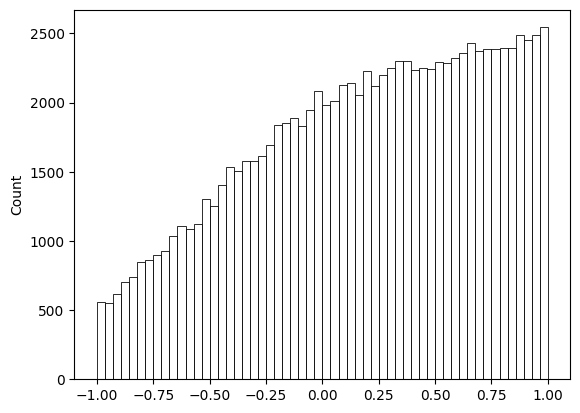

In [66]:
sns.histplot(array_for_hist, color='white')


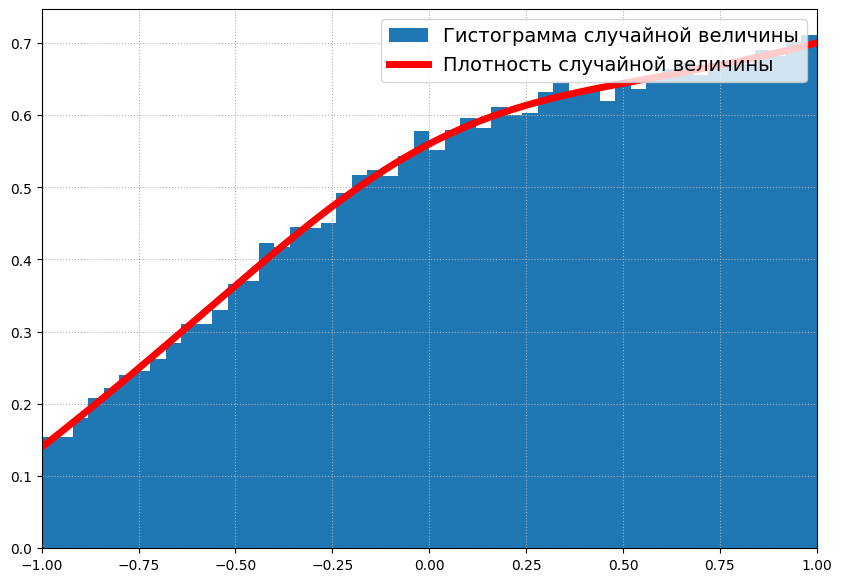

In [67]:
plt.figure(figsize=(10, 7))
fit_function_array = []
for i in range(len(f_array)):
   fit_function_array.append(f_array[i]*0.28)
    
plt.hist(array_for_hist,  bins=50, density=True, alpha=1, 
         label='Гистограмма случайной величины') 
plt.plot(x, fit_function_array, color='red', lw=5, 
         label='Плотность случайной величины') 
plt.xlim(-1, 1)
plt.legend(fontsize=14, loc=1)
plt.grid(ls=':')
plt.show()

In [68]:
print(np.mean(array_for_hist))
print(np.std(array_for_hist))

0.1883172712493763
0.5211251626440969


Значения вычисленные по точным формулам:

$\overline{x} = 0.1867 \pm 0.016$

$\sigma =  0.5216 \pm 0.012$

In [69]:
beta1 = atan(b) - atan(a)
beta2 = (0.5*b*b + b) - (0.5*a*a + a)

In [70]:
alpha1 = beta1/(beta1 + beta2)
alpha2 = beta2/(beta1 + beta2)


In [71]:
def generateComposition(a, b):
    while True:
        
        u = np.random.uniform(0.0, 1.0)
        y = np.random.uniform(0.0, 1.0)
        
        if (u >= 0) and (u < alpha1):
            value = tan(y*beta1 + atan(a))
            return value
        
        elif (u >= alpha1) and (u <= alpha1 + alpha2):
            value = -1 + sqrt(1 + 2*(y*beta2 + (0.5*a*a + a)))
            return value
        
        else: pass #could never reach this point

In [72]:
array_for_hist = []
time1 = time.time()
for i in range (0, 10000):
    k = generateComposition(-1, 1)
    array_for_hist.append(k)
time2 = time.time()
print(time2 - time1)



0.03339862823486328


<AxesSubplot: ylabel='Count'>

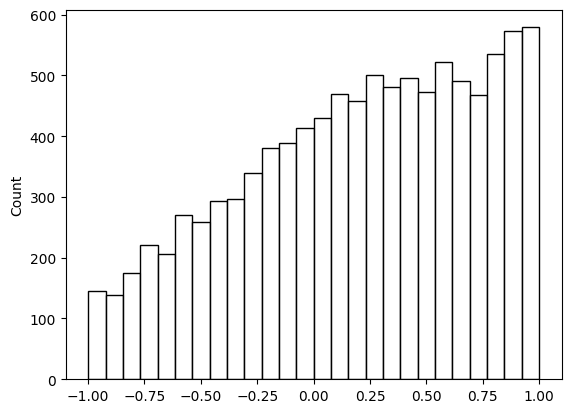

In [73]:
sns.histplot(array_for_hist, color='white')


In [75]:
print(np.mean(array_for_hist))
print(np.std(array_for_hist))

0.19336106948332205
0.5263348057960848


In [76]:
def f1(x):
    return 1 / (1 + x**2)


с0 = (a+1)**2
с1 = (b+1)**2-(a+1)**2

def abs_and_pow(x,n):
    if x>=0:
        return pow(x,n)
    else:
        return -pow(-x,n)
            
def F2(x):
    return ((x+1)**2 - с0)/2
            
def F2rev(x):
    return (abs_and_pow(с1*x + с0, 0.5)-1)

In [77]:
M1 = f1(b)
gamma1 = F2(b)

def doCompRej(a,b,M1,gamma1,f1,F2rev):
    beta1 = M1*(b-a)/(M1*(b-a)+gamma1)
    while True:
        value = float(np.random.uniform(0, 1))
        if value > beta1:#прямая выборка
            r1 = float(np.random.uniform(0, 1))
            return F2rev(r1)
        else:#neuman
            mu = float(np.random.uniform(0, M1))
            r2 = float(np.random.uniform(a, b))
            if mu<f1(r2):
                return r2

In [78]:
array_for_hist = []
time1 = time.time()
for i in range (0, 10000):
    k = doCompRej(a,b, M1, gamma1, f1, F2rev)
    array_for_hist.append(k)
time2 = time.time()
print(time2 - time1)

0.040077924728393555


<AxesSubplot: ylabel='Count'>

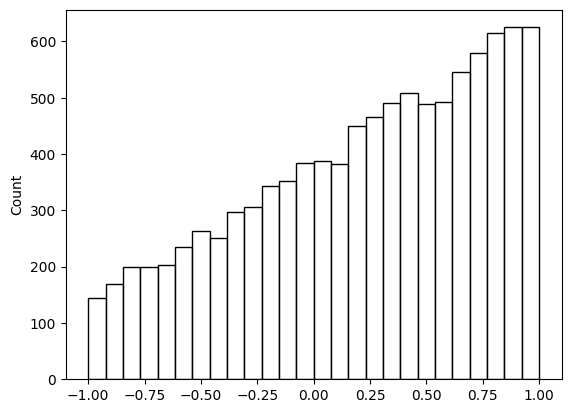

In [79]:
sns.histplot(array_for_hist, color='white')


In [80]:
print(np.mean(array_for_hist))
print(np.std(array_for_hist))

0.19336106948332205
0.5263348057960848


In [81]:
def invF(x):
    return x -1
def g(x):
    return 1 / (x**3 + x**2 + x + 1)
    
def method2():
    fmax = g(b)
    while True:
        r = invF(np.random.uniform(0, 1))
        nu = np.random.uniform(0, fmax)
        if (nu < g(r)):
            return r 

In [82]:
array_for_hist = []
time1 = time.time()
for i in range (0, 10000):
    k = method2()
    array_for_hist.append(k)
time2 = time.time()
print(time2 - time1)

0.03849029541015625


<AxesSubplot: ylabel='Count'>

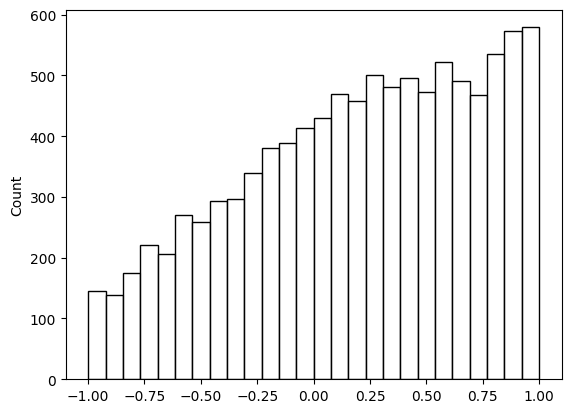

In [93]:
sns.histplot(array_for_hist, color='white')


In [92]:
print(np.mean(array_for_hist))
print(np.std(array_for_hist))

0.18636106948332204
0.5173348057960848
